<div align="center">
<strong> Project Title: Predicting Cardiovascular Disease Risk Using Logistic Regression and Statistical Analysis in R  <strong>
</div>

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Load Libraries and Dataset</b>
</h1>

In [ ]:
# Install the packages
install.packages("corrplot")
install.packages("car")
install.packages("knitr")
install.packages("pROC")            

In [6]:
# Load necessary packages
library(dplyr)
library(ggplot2)
library(corrplot)
library(car)
library(knitr)
library(pROC)  

In [46]:
# Load the dataset using read.csv from base R or delim from readr
df <- read.csv("/content/cardio_train.csv", sep = ";") # Using base R's read.csv
head(df)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,18393,2,168,62,110,80,1,1,0,0,1,0
2,1,20228,1,156,85,140,90,3,1,0,0,1,1
3,2,18857,1,165,64,130,70,3,1,0,0,0,1
4,3,17623,2,169,82,150,100,1,1,0,0,1,1
5,4,17474,1,156,56,100,60,1,1,0,0,0,0
6,8,21914,1,151,67,120,80,2,2,0,0,0,0


<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Check Dataset Structure</b>
</h1>

In [47]:
# View structure of the dataset
str(df)
# Check for missing values
missing_values <- colSums(is.na(df))
missing_values

'data.frame':	70000 obs. of  13 variables:
 $ id         : int  0 1 2 3 4 8 9 12 13 14 ...
 $ age        : int  18393 20228 18857 17623 17474 21914 22113 22584 17668 19834 ...
 $ gender     : int  2 1 1 2 1 1 1 2 1 1 ...
 $ height     : int  168 156 165 169 156 151 157 178 158 164 ...
 $ weight     : num  62 85 64 82 56 67 93 95 71 68 ...
 $ ap_hi      : int  110 140 130 150 100 120 130 130 110 110 ...
 $ ap_lo      : int  80 90 70 100 60 80 80 90 70 60 ...
 $ cholesterol: int  1 3 3 1 1 2 3 3 1 1 ...
 $ gluc       : int  1 1 1 1 1 2 1 3 1 1 ...
 $ smoke      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ alco       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ active     : int  1 1 0 1 0 0 1 1 1 0 ...
 $ cardio     : int  0 1 1 1 0 0 0 1 0 0 ...


id         age      gender      height      weight       ap_hi 
          0           0           0           0           0           0 
      ap_lo cholesterol        gluc       smoke        alco      active 
          0           0           0           0           0           0 
     cardio 
          0

In [48]:
# Remove duplicates (if any)
df <- df %>% distinct()
# Check for unrealistic values (e.g., height, weight, or blood pressure)
summary(df)

       id             age            gender         height     
 Min.   :    0   Min.   :10798   Min.   :1.00   Min.   : 55.0  
 1st Qu.:25007   1st Qu.:17664   1st Qu.:1.00   1st Qu.:159.0  
 Median :50002   Median :19703   Median :1.00   Median :165.0  
 Mean   :49972   Mean   :19469   Mean   :1.35   Mean   :164.4  
 3rd Qu.:74889   3rd Qu.:21327   3rd Qu.:2.00   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.00   Max.   :250.0  
     weight           ap_hi             ap_lo           cholesterol   
 Min.   : 10.00   Min.   : -150.0   Min.   :  -70.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:  120.0   1st Qu.:   80.00   1st Qu.:1.000  
 Median : 72.00   Median :  120.0   Median :   80.00   Median :1.000  
 Mean   : 74.21   Mean   :  128.8   Mean   :   96.63   Mean   :1.367  
 3rd Qu.: 82.00   3rd Qu.:  140.0   3rd Qu.:   90.00   3rd Qu.:2.000  
 Max.   :200.00   Max.   :16020.0   Max.   :11000.00   Max.   :3.000  
      gluc           smoke              alco           

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b>  Data Cleaning</b>
</h1>

In [49]:
# Filter out incorrect or unrealistic rows
df <- df %>%
  filter(height > 100 & height < 250,  # Reasonable height range
         weight > 30 & weight < 200,   # Reasonable weight range
         ap_hi > 50 & ap_hi < 250,     # Systolic BP range
         ap_lo > 30 & ap_lo < 180)     # Diastolic BP range

# Verify cleaned data
summary(df)

       id             age            gender          height     
 Min.   :    0   Min.   :10798   Min.   :1.000   Min.   :104.0  
 1st Qu.:24998   1st Qu.:17658   1st Qu.:1.000   1st Qu.:159.0  
 Median :50017   Median :19701   Median :1.000   Median :165.0  
 Mean   :49974   Mean   :19465   Mean   :1.349   Mean   :164.4  
 3rd Qu.:74868   3rd Qu.:21324   3rd Qu.:2.000   3rd Qu.:170.0  
 Max.   :99999   Max.   :23713   Max.   :2.000   Max.   :207.0  
     weight           ap_hi           ap_lo         cholesterol   
 Min.   : 31.00   Min.   : 60.0   Min.   : 40.00   Min.   :1.000  
 1st Qu.: 65.00   1st Qu.:120.0   1st Qu.: 80.00   1st Qu.:1.000  
 Median : 72.00   Median :120.0   Median : 80.00   Median :1.000  
 Mean   : 74.12   Mean   :126.6   Mean   : 81.37   Mean   :1.365  
 3rd Qu.: 82.00   3rd Qu.:140.0   3rd Qu.: 90.00   3rd Qu.:2.000  
 Max.   :183.00   Max.   :240.0   Max.   :170.00   Max.   :3.000  
      gluc           smoke              alco             active      
 Min. 

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Exploratory Data Analysis (EDA)</b>
</h1>

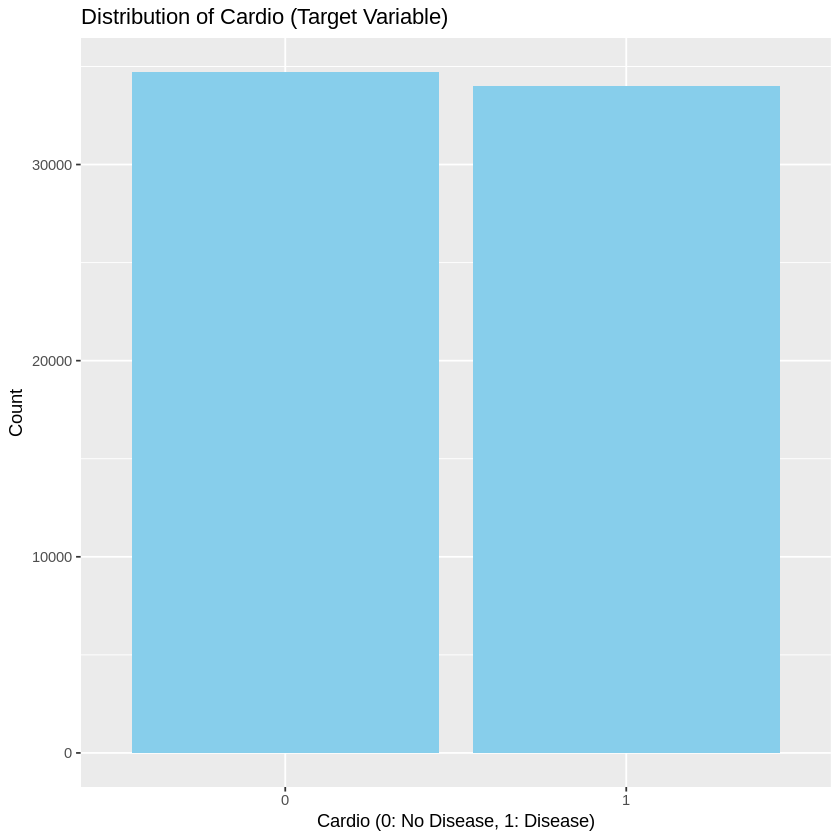

In [51]:
# Distribution of 'cardio' (target variable)
ggplot(df, aes(x = factor(cardio))) +
  geom_bar(fill = "skyblue") +
  labs(title = "Distribution of Cardio (Target Variable)",
       x = "Cardio (0: No Disease, 1: Disease)", y = "Count")

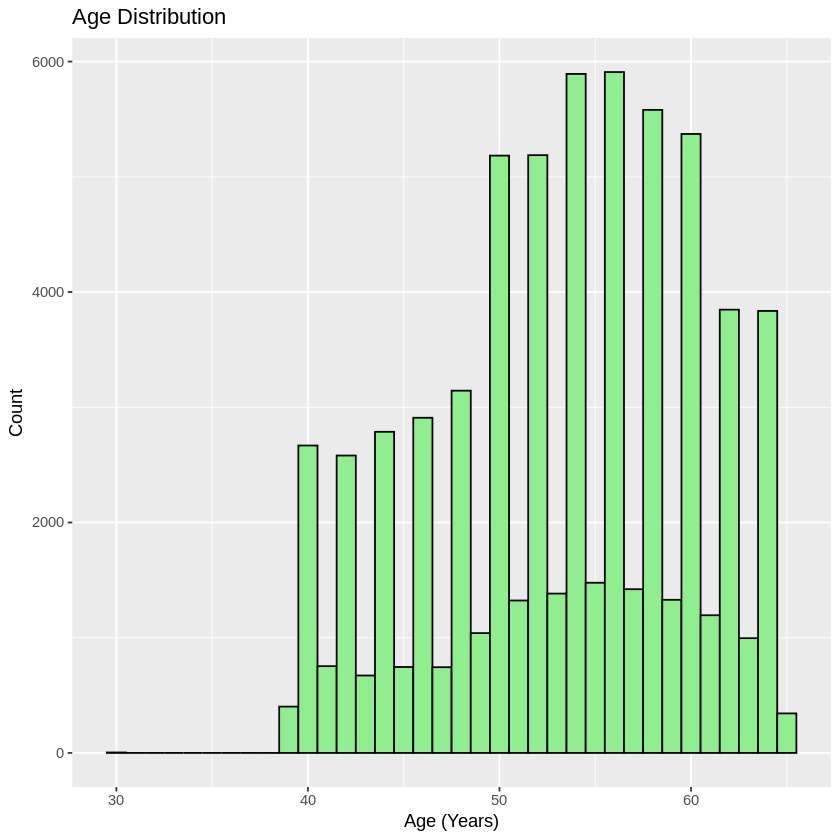

In [52]:
# Age distribution
ggplot(df, aes(x = age / 365)) +  # Convert age from days to years
  geom_histogram(binwidth = 1, fill = "lightgreen", color = "black") +
  labs(title = "Age Distribution", x = "Age (Years)", y = "Count")

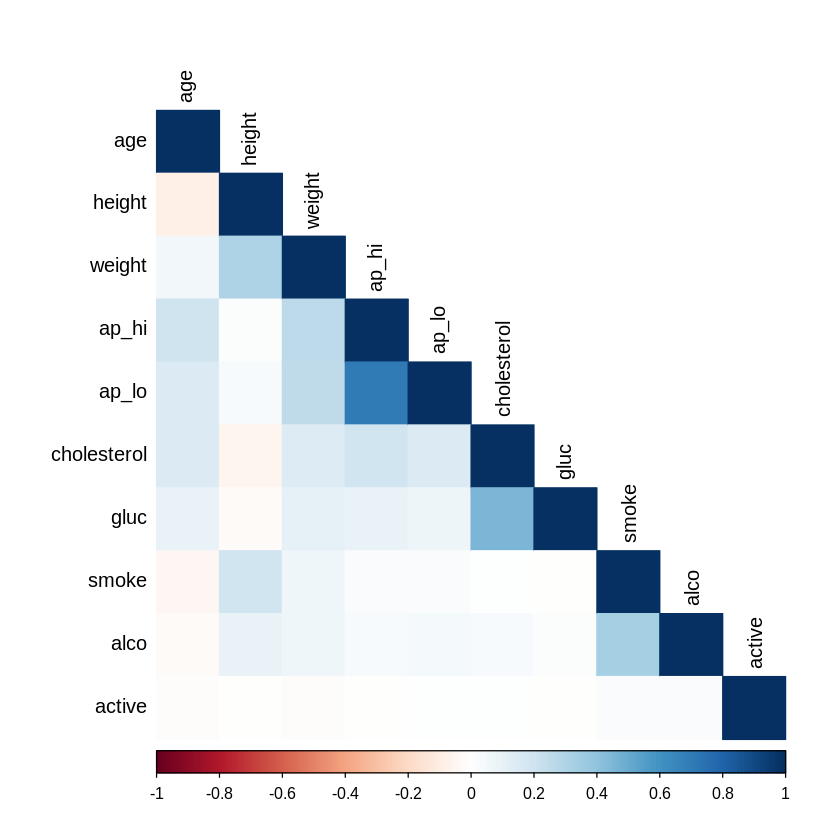

In [53]:
# Correlation Matrix
numeric_cols <- df %>% select(-id, -gender, -cardio)  # Exclude non-numeric columns
cor_matrix <- cor(numeric_cols)
# Visualize correlation matrix
corrplot(cor_matrix, method = "color", type = "lower", tl.col = "black")

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Feature Analysis</b>
</h1>

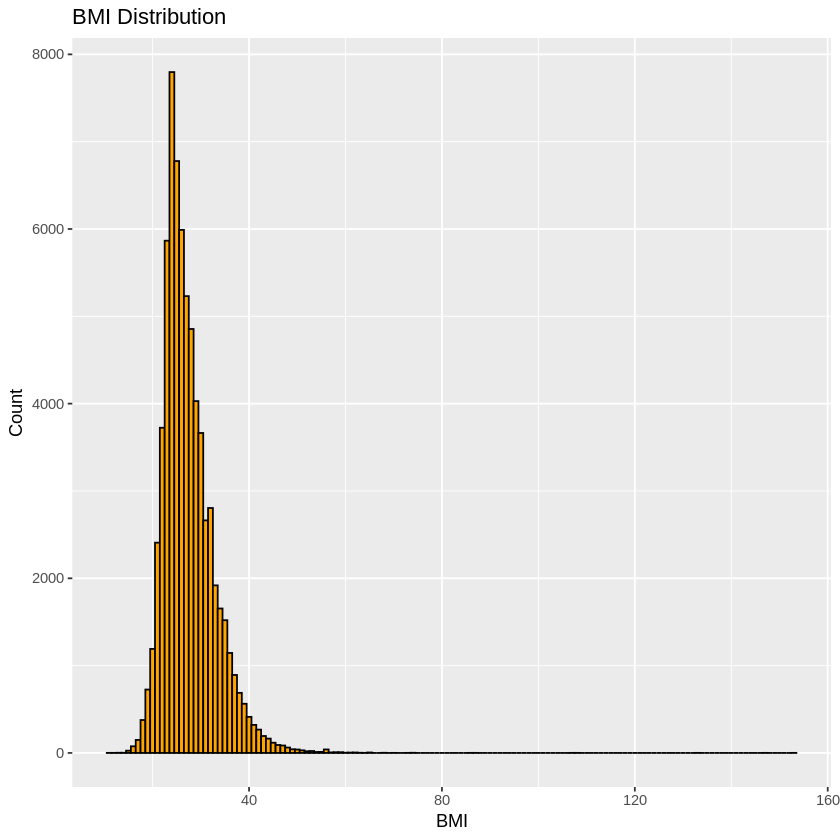

In [54]:
# BMI Calculation and Analysis
df <- df %>%
  mutate(BMI = weight / (height / 100)^2)  # BMI = weight(kg) / height(m)^2
# BMI distribution
ggplot(df, aes(x = BMI)) +
  geom_histogram(binwidth = 1, fill = "orange", color = "black") +
  labs(title = "BMI Distribution", x = "BMI", y = "Count")

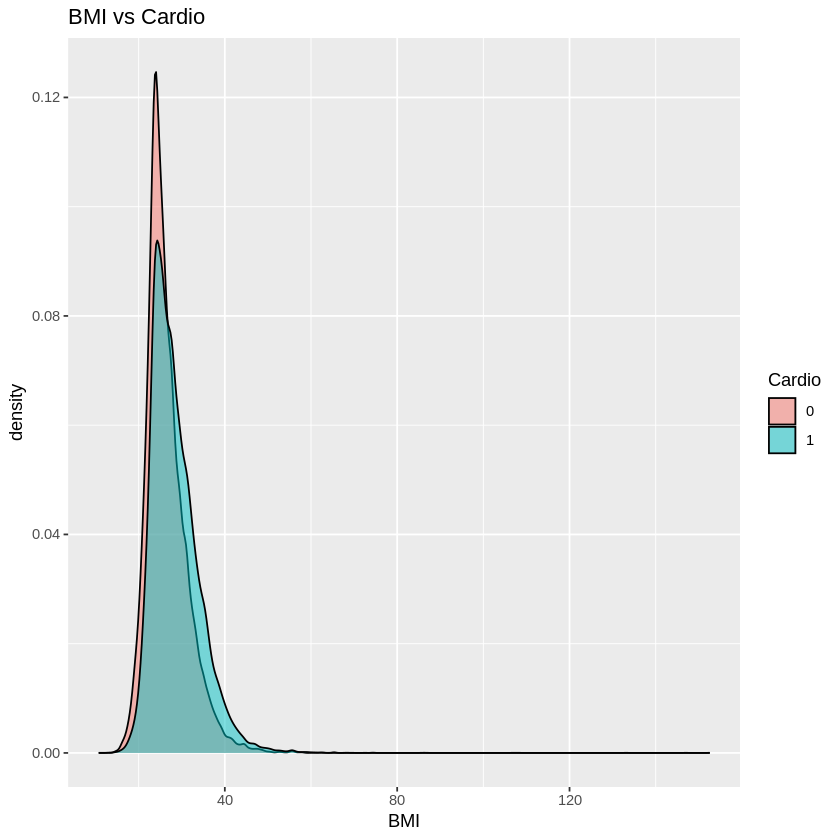

In [55]:
# Relationship between BMI and Cardio
ggplot(df, aes(x = BMI, fill = factor(cardio))) +
  geom_density(alpha = 0.5) +
  labs(title = "BMI vs Cardio", x = "BMI", fill = "Cardio")

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Modeling: Logistic Regression</b>
</h1>

In [56]:
# Split the dataset into training and test sets (70-30 split)
set.seed(123)  # For reproducibility
train_indices <- sample(1:nrow(df), 0.7 * nrow(df))
train <- df[train_indices, ]
test <- df[-train_indices, ]

# Logistic Regression Model
logistic_model <- glm(cardio ~ age + gender + height + weight + ap_hi + ap_lo + cholesterol + gluc + smoke + alco + active + BMI,
                      data = train, family = binomial)

# Model Summary
summary(logistic_model)

# Predict on Test Set
test$pred_prob <- predict(logistic_model, newdata = test, type = "response")
test$pred <- ifelse(test$pred_prob > 0.5, 1, 0)

# Confusion Matrix
conf_matrix <- table(Predicted = test$pred, Actual = test$cardio)
print(conf_matrix)

# Model Accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Model Accuracy:", accuracy)


Call:
glm(formula = cardio ~ age + gender + height + weight + ap_hi + 
    ap_lo + cholesterol + gluc + smoke + alco + active + BMI, 
    family = binomial, data = train)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -9.227e+00  9.918e-01  -9.303  < 2e-16 ***
age          1.412e-04  4.433e-06  31.852  < 2e-16 ***
gender       8.601e-03  2.641e-02   0.326 0.744682    
height      -1.613e-02  6.040e-03  -2.670 0.007579 ** 
weight       2.335e-02  6.336e-03   3.686 0.000228 ***
ap_hi        5.305e-02  1.041e-03  50.959  < 2e-16 ***
ap_lo        1.515e-02  1.626e-03   9.317  < 2e-16 ***
cholesterol  5.238e-01  1.872e-02  27.985  < 2e-16 ***
gluc        -1.356e-01  2.118e-02  -6.405 1.50e-10 ***
smoke       -1.549e-01  4.184e-02  -3.703 0.000213 ***
alco        -2.221e-01  5.070e-02  -4.381 1.18e-05 ***
active      -2.038e-01  2.614e-02  -7.795 6.42e-15 ***
BMI         -3.289e-02  1.669e-02  -1.970 0.048817 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

         Actual
Predicted    0    1
        0 8151 3506
        1 2229 6733
Model Accuracy: 0.7218585

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Coefficient Plot (Effect Size and Direction</b>
</h1>

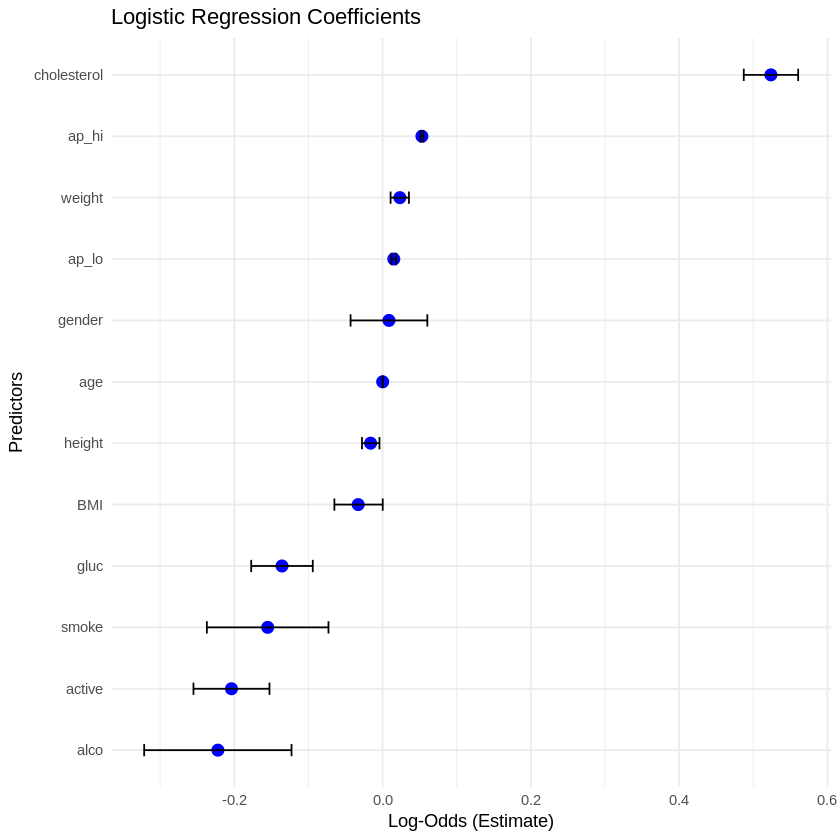

In [57]:
library(ggplot2)
library(broom)

# Extract model coefficients and confidence intervals
coefficients <- tidy(logistic_model, conf.int = TRUE)

# Exclude intercept for better visualization
coefficients <- coefficients %>% filter(term != "(Intercept)")

# Plot Coefficients
ggplot(coefficients, aes(x = reorder(term, estimate), y = estimate)) +
  geom_point(color = "blue", size = 3) +
  geom_errorbar(aes(ymin = conf.low, ymax = conf.high), width = 0.2) +
  coord_flip() +
  labs(title = "Logistic Regression Coefficients",
       x = "Predictors", y = "Log-Odds (Estimate)") +
  theme_minimal()

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Predicted Probability vs Observed Outcomes</b>
</h1>

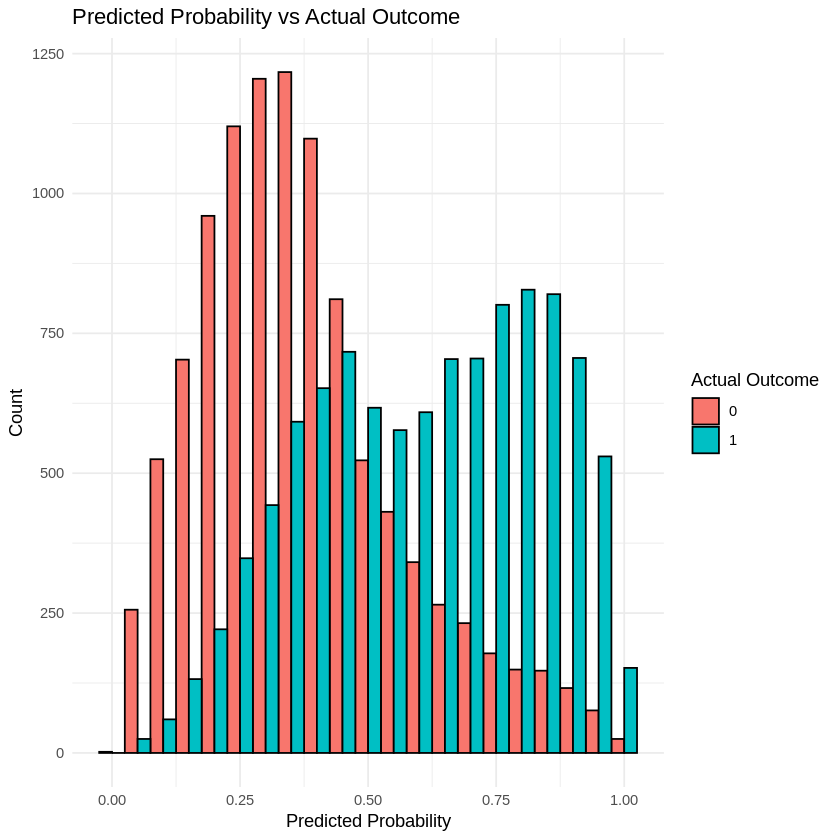

In [58]:
# Add predicted probabilities to the test data
test$pred_prob <- predict(logistic_model, newdata = test, type = "response")

# Visualize predicted probabilities
ggplot(test, aes(x = pred_prob, fill = factor(cardio))) +
  geom_histogram(binwidth = 0.05, position = "dodge", color = "black") +
  labs(title = "Predicted Probability vs Actual Outcome",
       x = "Predicted Probability", y = "Count", fill = "Actual Outcome") +
  theme_minimal()

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> ROC Curve (Model Performance)</b>
</h1>

Setting levels: control = 0, case = 1

Setting direction: controls < cases



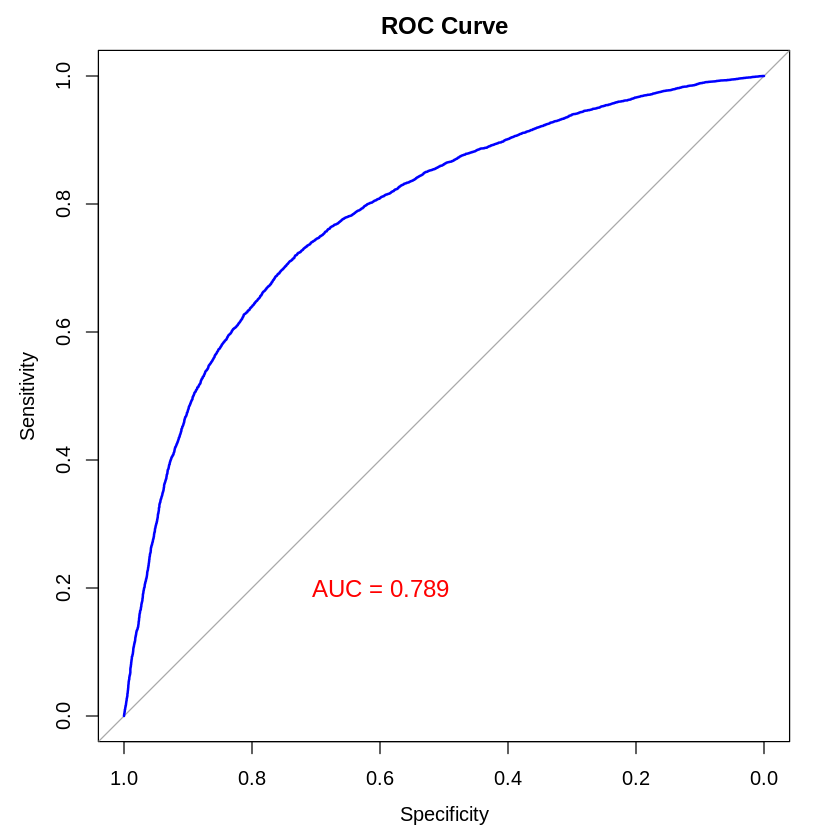

In [63]:
# Create ROC curve
roc_curve <- roc(test$cardio, test$pred_prob)

# Plot ROC curve
plot(roc_curve, col = "blue", main = "ROC Curve")
auc_value <- auc(roc_curve)
text(0.6, 0.2, paste("AUC =", round(auc_value, 3)), col = "red", cex = 1.2)

## Age vs Cardio

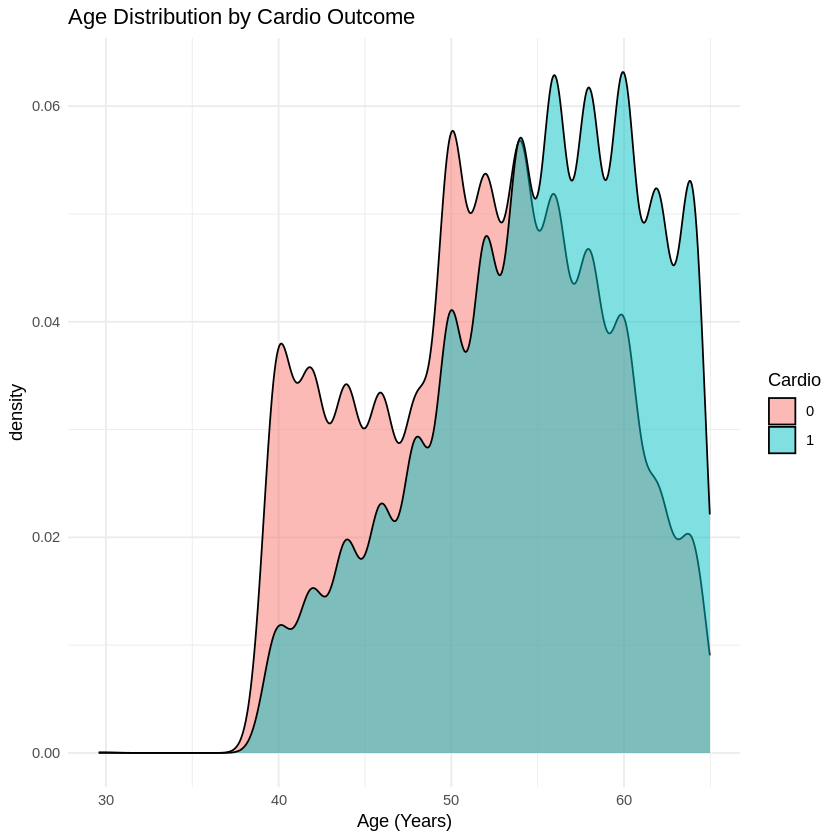

In [64]:
ggplot(df, aes(x = age / 365, fill = factor(cardio))) +
  geom_density(alpha = 0.5) +
  labs(title = "Age Distribution by Cardio Outcome",
       x = "Age (Years)", fill = "Cardio") +
  theme_minimal()

## Systolic BP (ap_hi) vs Cardio

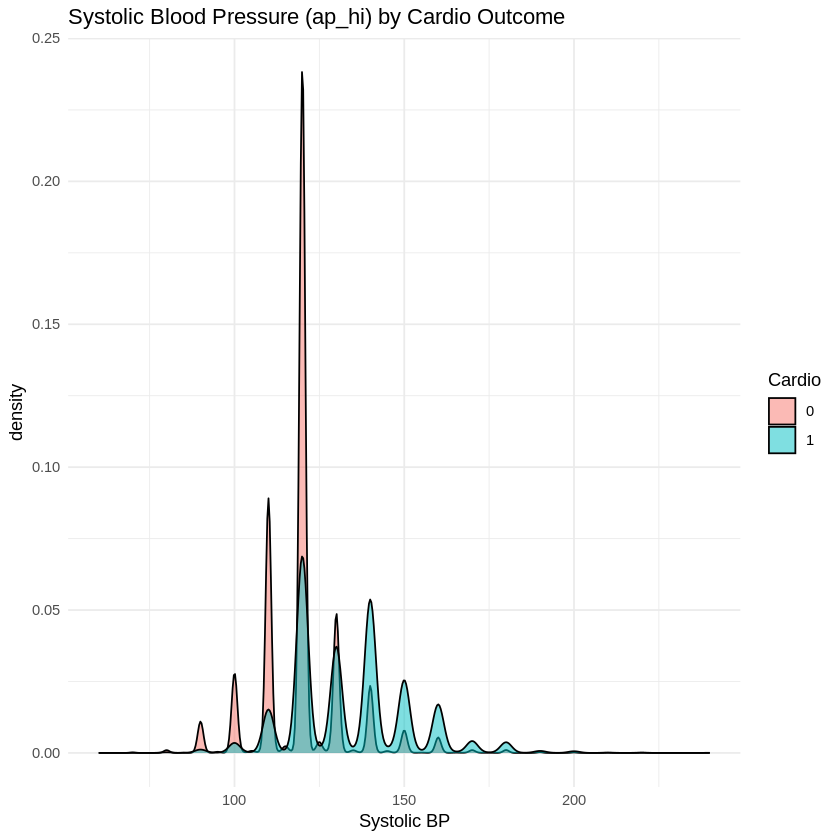

In [65]:
ggplot(df, aes(x = ap_hi, fill = factor(cardio))) +
  geom_density(alpha = 0.5) +
  labs(title = "Systolic Blood Pressure (ap_hi) by Cardio Outcome",
       x = "Systolic BP", fill = "Cardio") +
  theme_minimal()

## BMI vs Cardio

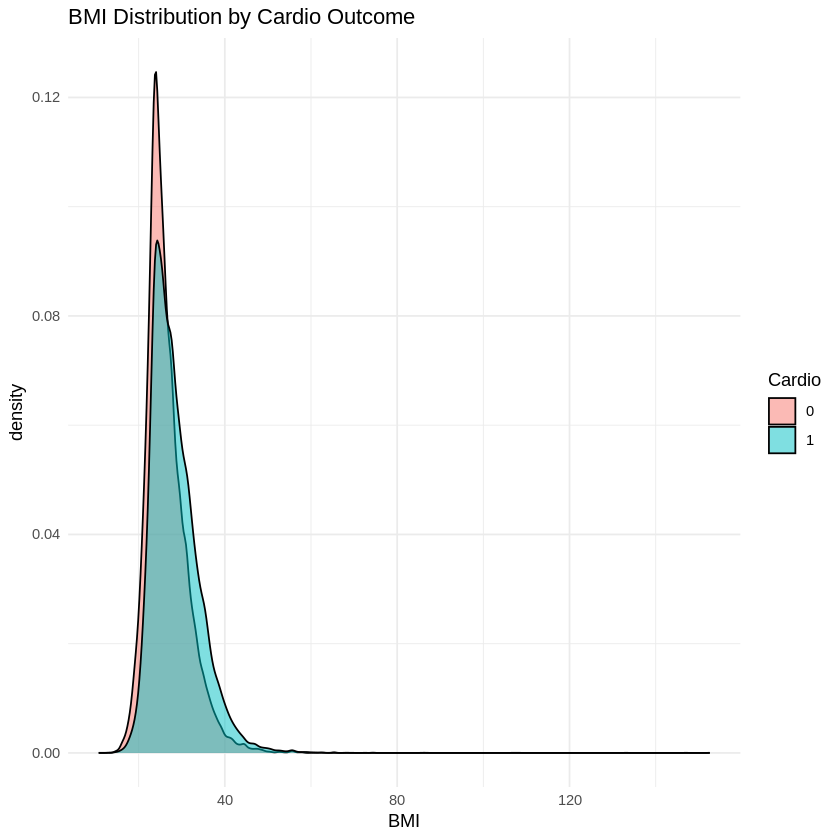

In [66]:
ggplot(df, aes(x = BMI, fill = factor(cardio))) +
  geom_density(alpha = 0.5) +
  labs(title = "BMI Distribution by Cardio Outcome",
       x = "BMI", fill = "Cardio") +
  theme_minimal()

<a id="1"></a>
<h1 style="
    background-image: url('https://i.postimg.cc/76kNRZtb/we.webp');
    background-size: cover;
    background-repeat: no-repeat;
    font-family: 'Arial', sans-serif;
    font-size: 24px;
    color: white;
    text-align: center;
    border-radius: 15px 50px;
    padding: 20px 40px;
    margin: 20px 0;
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <b> Gender-Based Analysis</b>
</h1>

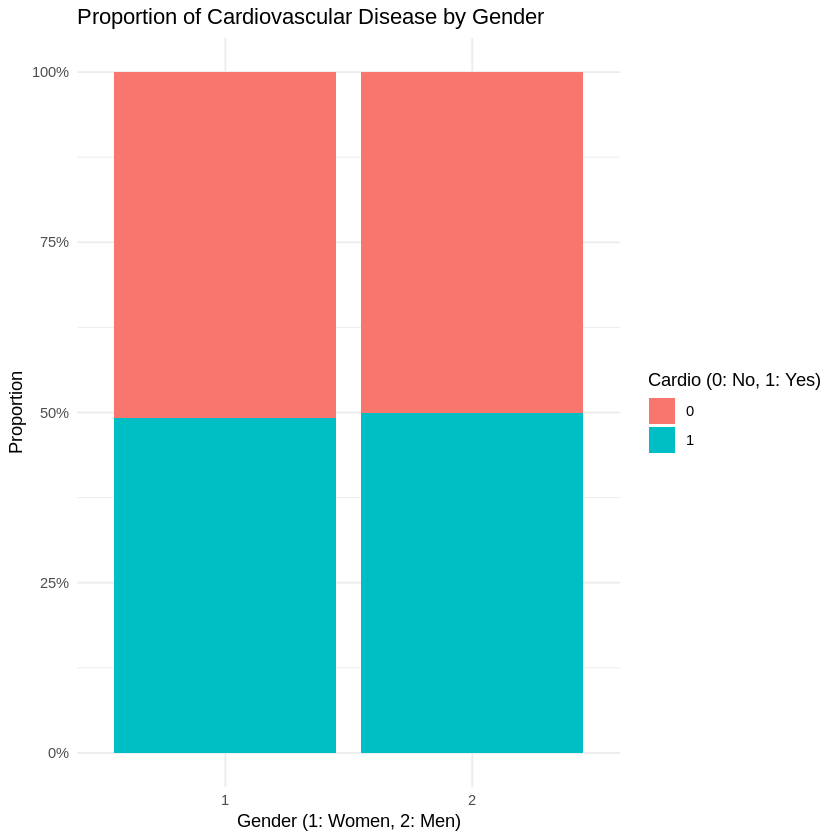

In [67]:
# Bar plot of cardio outcome by gender
ggplot(df, aes(x = factor(gender), fill = factor(cardio))) +
  geom_bar(position = "fill") +
  labs(title = "Proportion of Cardiovascular Disease by Gender",
       x = "Gender (1: Women, 2: Men)", y = "Proportion",
       fill = "Cardio (0: No, 1: Yes)") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

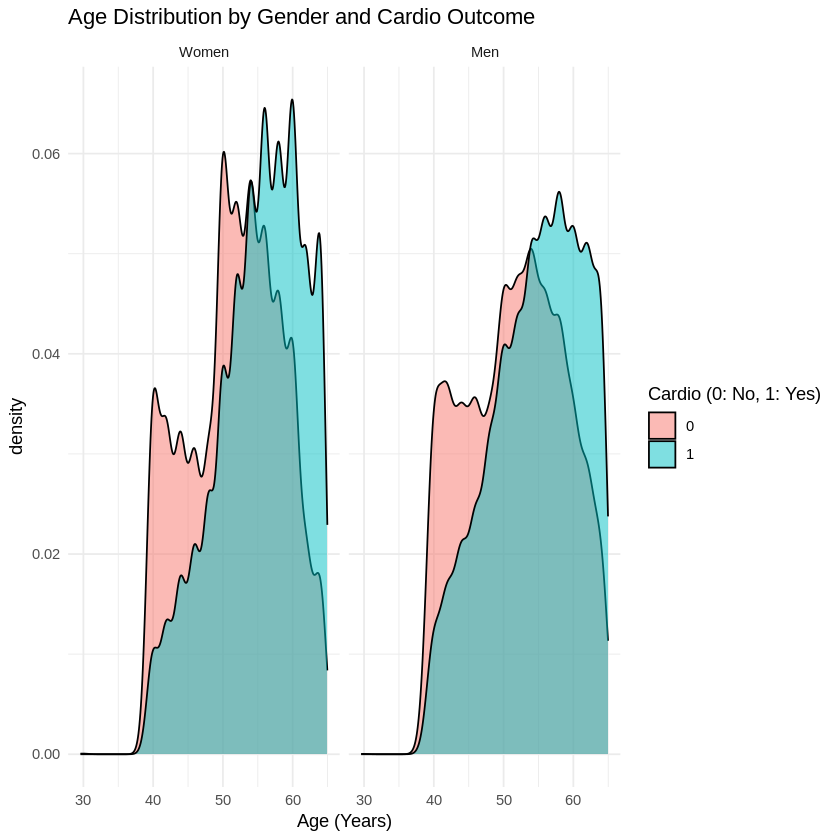

In [68]:
# Add age in years for better readability
df <- df %>% mutate(age_years = age / 365)

# Density plot for age by gender and cardio outcome
ggplot(df, aes(x = age_years, fill = factor(cardio))) +
  geom_density(alpha = 0.5) +
  facet_wrap(~ gender, labeller = labeller(gender = c("1" = "Women", "2" = "Men"))) +
  labs(title = "Age Distribution by Gender and Cardio Outcome",
       x = "Age (Years)", fill = "Cardio (0: No, 1: Yes)") +
  theme_minimal()

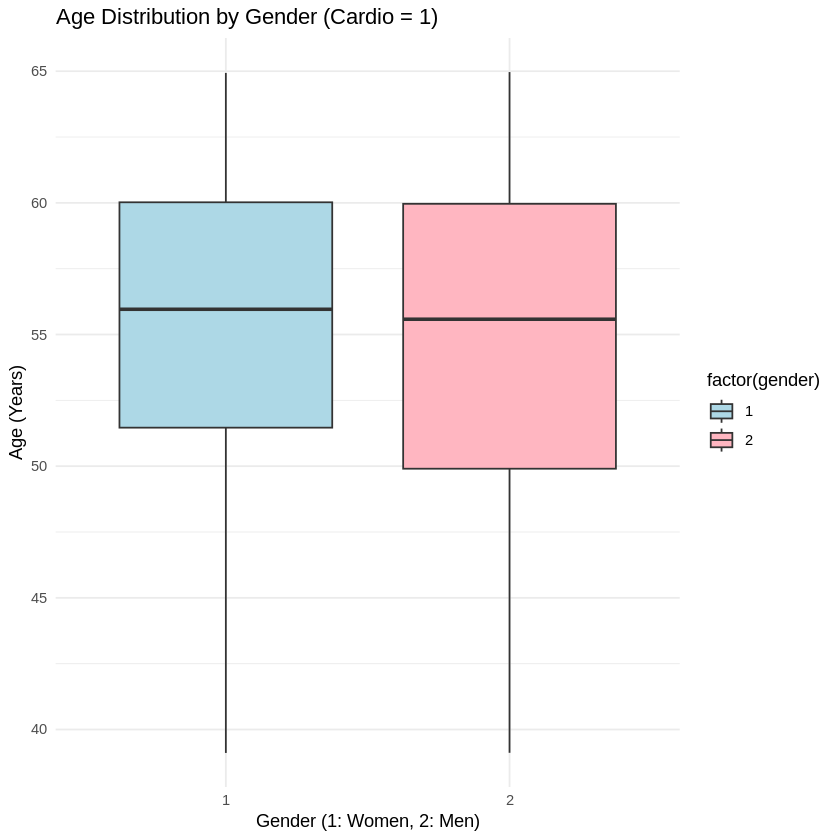

In [70]:
# Boxplot for Age
ggplot(df %>% filter(cardio == 1), aes(x = factor(gender), y = age_years, fill = factor(gender))) +
  geom_boxplot() +
  labs(title = "Age Distribution by Gender (Cardio = 1)",
       x = "Gender (1: Women, 2: Men)", y = "Age (Years)") +
  scale_fill_manual(values = c("lightblue", "lightpink")) +
  theme_minimal()

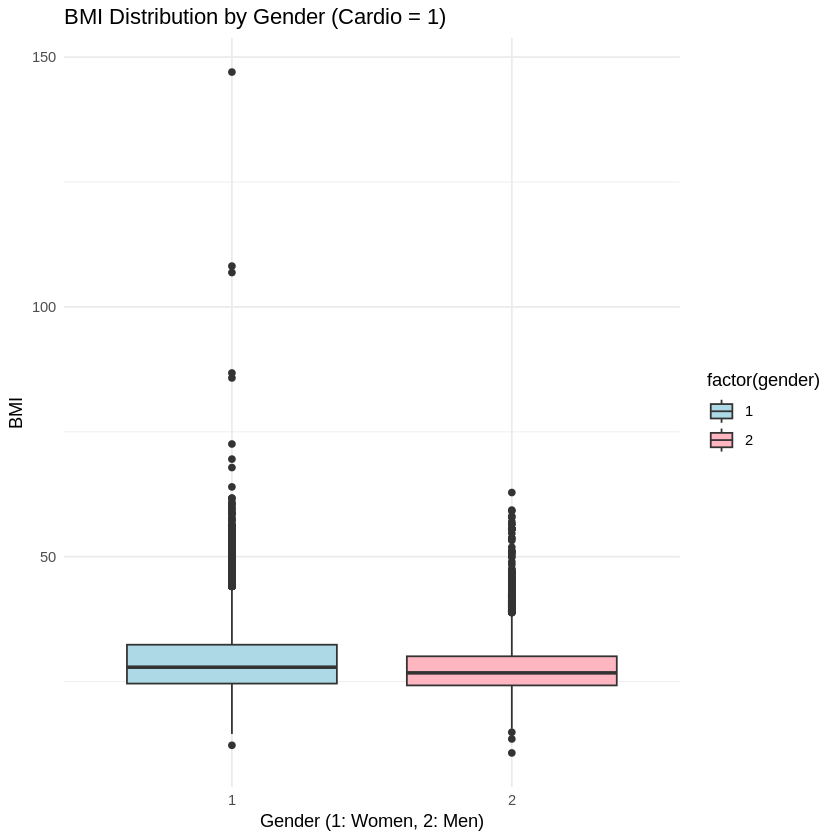

In [71]:
# Boxplot for BMI
ggplot(df %>% filter(cardio == 1), aes(x = factor(gender), y = BMI, fill = factor(gender))) +
  geom_boxplot() +
  labs(title = "BMI Distribution by Gender (Cardio = 1)",
       x = "Gender (1: Women, 2: Men)", y = "BMI") +
  scale_fill_manual(values = c("lightblue", "lightpink")) +
  theme_minimal()

<div align="right">
<strong> Name: Mahendra Singh | Roll No: SE24PLSC006 | PhD-Scholar | CLS,MU <strong>
</div>